In [1]:
from utils.data_wrapper import DataWrapper
from utils.visualizer import Visualizer

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = DataWrapper(df="./data/final_dataset.csv")

./data/final_dataset.csv


In [4]:
TRAIN_SIZE = 0.7
VALID_SIZE = 0.1

In [5]:
vis = Visualizer(df.df)

In [6]:
df.df.columns

Index(['date', 'time', 'classroom_type', 'classroom_category', 'room_no',
       'device_code', 'school_no', 'grade', 'measured_t', 'measured_rh',
       'measured_co2', 'measured_pm1.0', 'measured_pm2.5', 'measured_pm10',
       'school_day', 'school_hours', 'break_time', 'power_on',
       'outdoor_temperature', 'tmstamp', 'trackerwm_avg', 'tracker2wm_avg',
       'shadowwm_avg', 'sunwm_avg', 'shadowbandwm_avg', 'dnicalc_avg',
       'airtc_avg', 'rh', 'ws_ms_s_wvt', 'winddir_d1_wvt', 'winddir_sd1_wvt',
       'bp_mb_avg', 'uva_avg', 'uvb_avg', 'battv_min', 'batt24v_min'],
      dtype='object')

In [7]:
df.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372084 entries, 0 to 372083
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 372084 non-null  object 
 1   time                 372084 non-null  object 
 2   classroom_type       372084 non-null  object 
 3   classroom_category   372084 non-null  object 
 4   room_no              372084 non-null  int64  
 5   device_code          372084 non-null  int64  
 6   school_no            372084 non-null  int64  
 7   grade                372084 non-null  int64  
 8   measured_t           372079 non-null  float64
 9   measured_rh          372082 non-null  float64
 10  measured_co2         338195 non-null  float64
 11  measured_pm1.0       354202 non-null  float64
 12  measured_pm2.5       354202 non-null  float64
 13  measured_pm10        354202 non-null  float64
 14  school_day           372084 non-null  object 
 15  school_hours     

In [8]:
target_column = "outdoor_temperature"

In [9]:
cat_feats = df.get_categorical_columns()
cat_feats = list(set(cat_feats) - set(["date", "time", "tmstamp"]))
for cat_feat in cat_feats:
    df.label_encoding(cat_feat)
    print(f"Column: {cat_feat}, Uniques: {df.df[cat_feat].nunique()}")

Column: break_time, Uniques: 2
Column: school_day, Uniques: 2
Column: classroom_type, Uniques: 6
Column: classroom_category, Uniques: 2
Column: school_hours, Uniques: 2
Column: power_on, Uniques: 3


In [10]:
for cat_feat in cat_feats:
    print(df.value_counts(cat_feat))


break_time
0    353979
1     18105
Name: count, dtype: int64
school_day
1    230177
0    141907
Name: count, dtype: int64
classroom_type
1    79646
5    69130
2    65022
3    60873
0    54234
4    43179
Name: count, dtype: int64
classroom_category
0    198902
1    173182
Name: count, dtype: int64
school_hours
0    316733
1     55351
Name: count, dtype: int64
power_on
1    313337
0     57243
2      1504
Name: count, dtype: int64


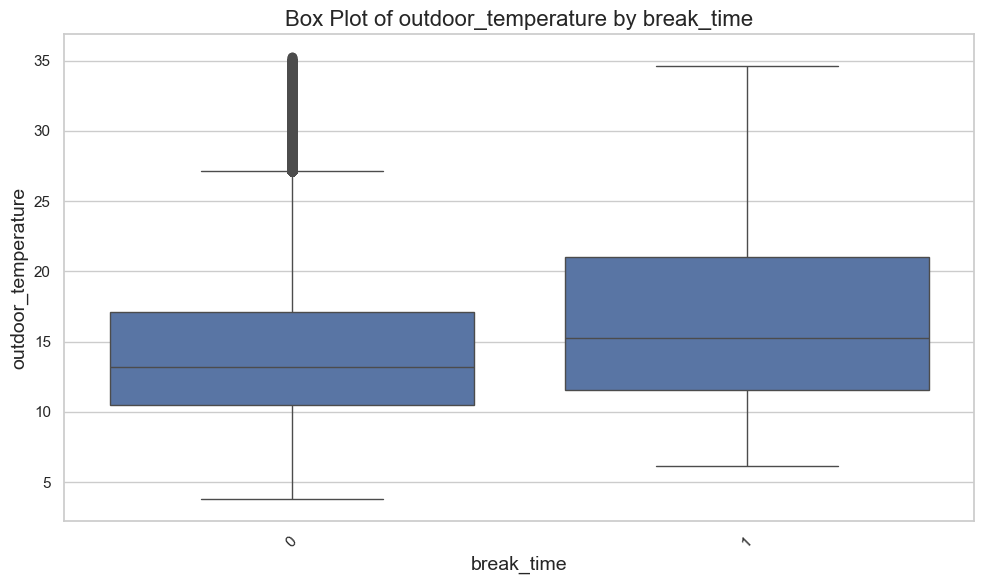

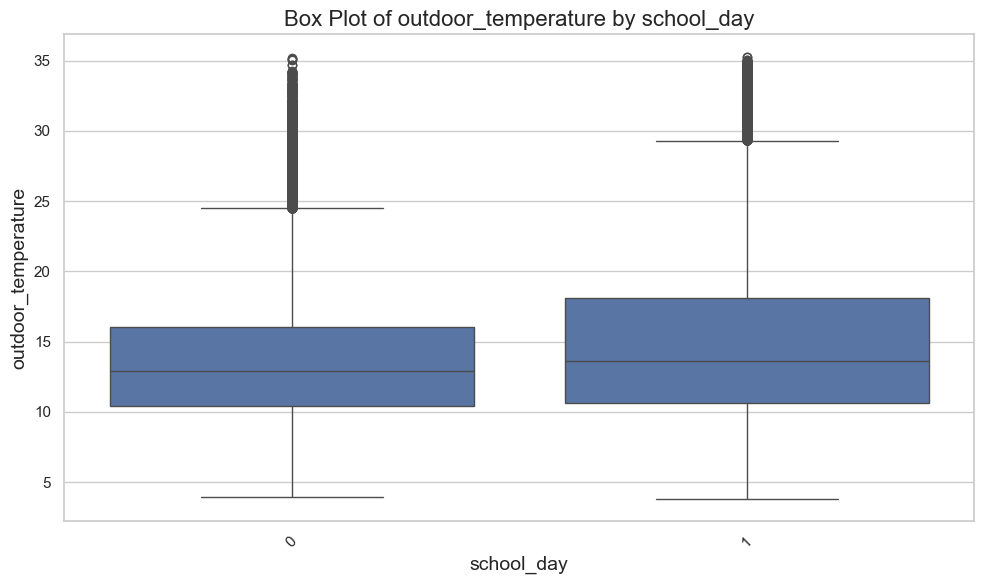

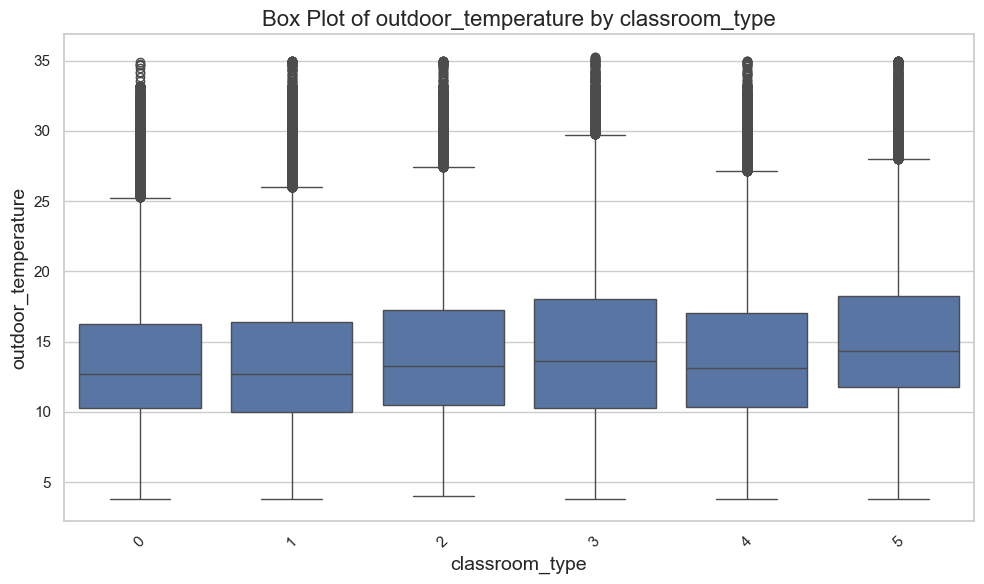

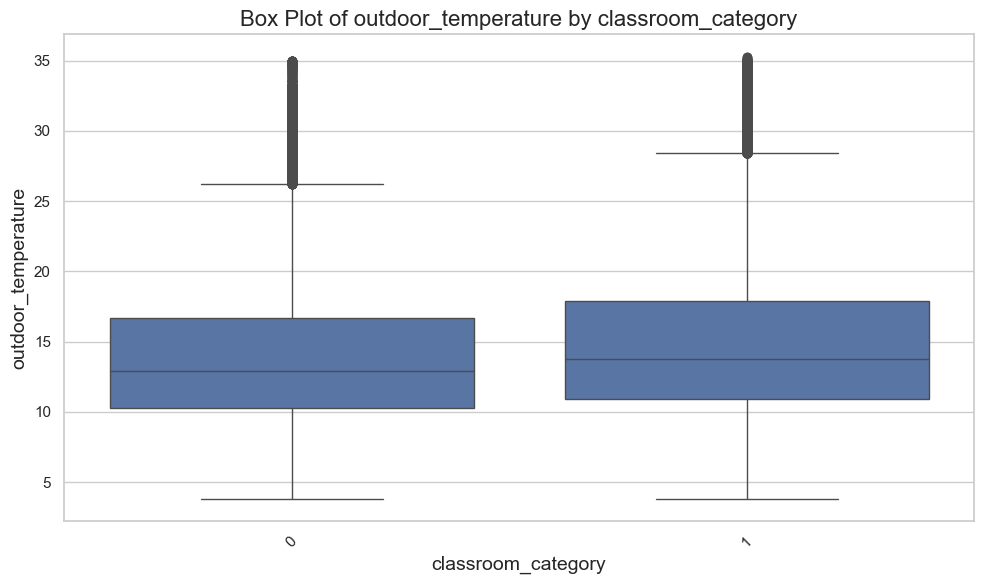

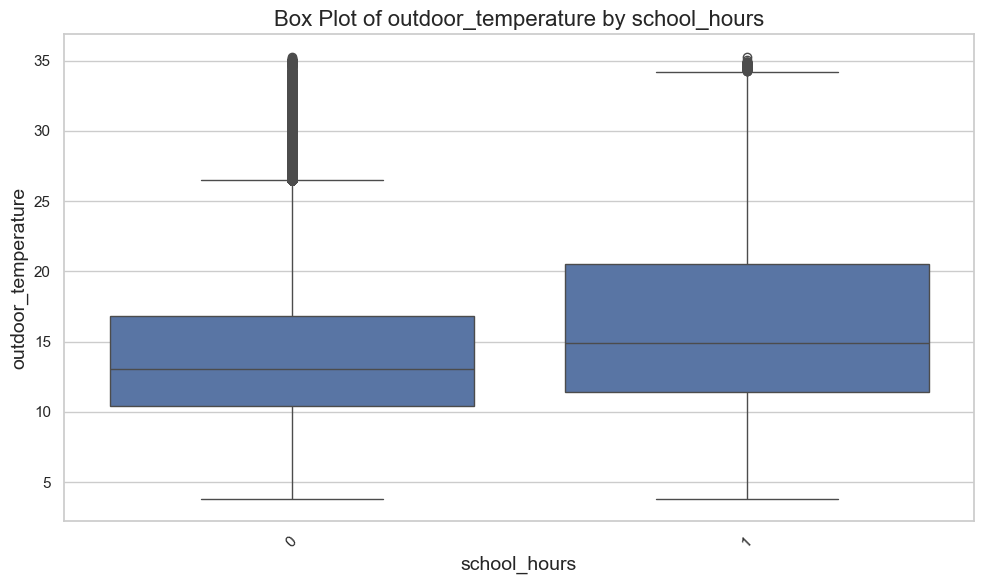

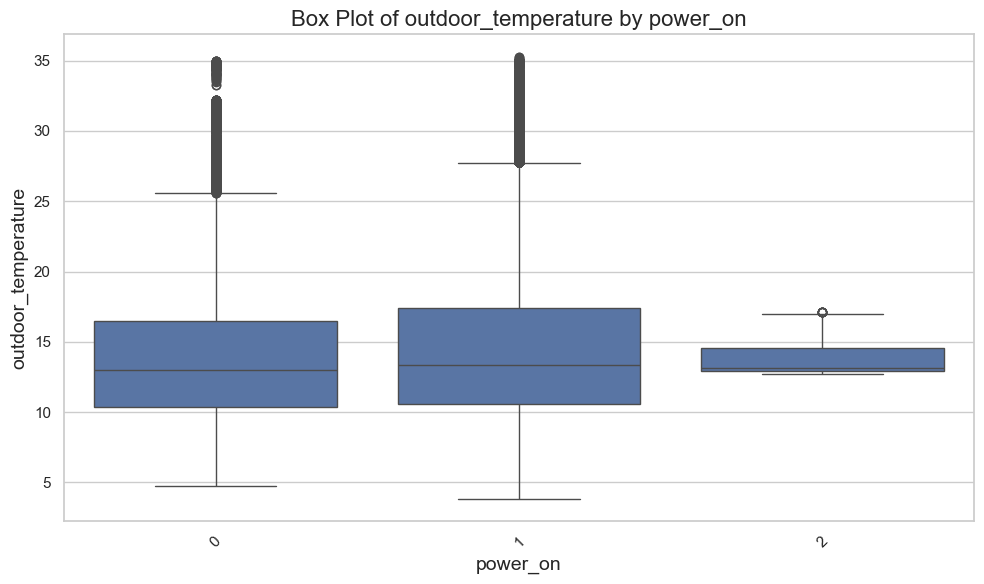

In [11]:
for cat_feat in cat_feats:
    vis.boxplot(x=cat_feat, y=target_column)

In [12]:
df.df[cat_feats].isna().sum()

break_time            0
school_day            0
classroom_type        0
classroom_category    0
school_hours          0
power_on              0
dtype: int64

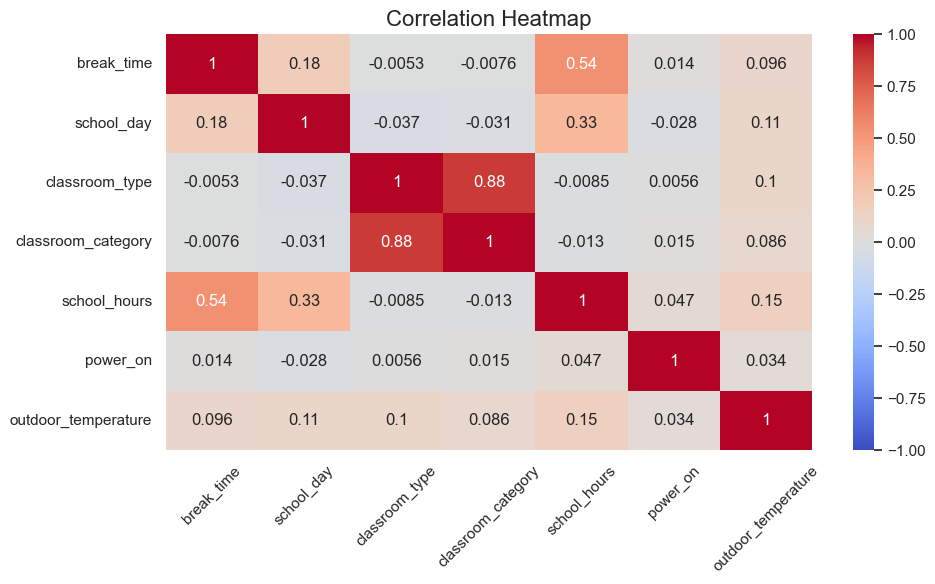

In [13]:
#df.cont_corr(columns=cat_feats + [target_column])
vis.heatmap(columns=cat_feats + [target_column])

In [14]:
cat_feats_groups = {}
for cat_feat in cat_feats:
    df.one_hot_encoding(cat_feat)
    cat_feats_groups[cat_feat] = []
    for col in df.df.columns:
        if cat_feat in col:
            cat_feats_groups[cat_feat].append(col)
cat_feats_groups

{'break_time': ['break_time_1'],
 'school_day': ['school_day_1'],
 'classroom_type': ['classroom_type_1',
  'classroom_type_2',
  'classroom_type_3',
  'classroom_type_4',
  'classroom_type_5'],
 'classroom_category': ['classroom_category_1'],
 'school_hours': ['school_hours_1'],
 'power_on': ['power_on_1', 'power_on_2']}

In [15]:
binary_corrs = {}
for k, v in cat_feats_groups.items():
    binary_corrs[k] = {}
    for c in v:
        binary_corrs[k][c] = float(df.binary_corr(c, target_column))
    print("Column: ", k)
    print(binary_corrs[k])

Column:  break_time
{'break_time_1': 0.09643321114279708}
Column:  school_day
{'school_day_1': 0.10747821001080718}
Column:  classroom_type
{'classroom_type_1': -0.06115464811235702, 'classroom_type_2': 0.0006867142623007397, 'classroom_type_3': 0.025997064808724754, 'classroom_type_4': -0.011183947916582003, 'classroom_type_5': 0.09452024004568144}
Column:  classroom_category
{'classroom_category_1': 0.08579956508462419}
Column:  school_hours
{'school_hours_1': 0.1510989600867801}
Column:  power_on
{'power_on_1': 0.0363020585839523, 'power_on_2': -0.005852898633164031}


In [16]:
# garbage column
df.df.drop(columns=['tracker2wm_avg'], inplace=True)

In [17]:
cont_feats = df.get_continuous_numeric_columns()
cont_feats = list(set(cont_feats) - set(['device_code', target_column]) - set(cat_feats))
cont_feats

['shadowbandwm_avg',
 'uva_avg',
 'winddir_d1_wvt',
 'winddir_sd1_wvt',
 'measured_co2',
 'dnicalc_avg',
 'rh',
 'ws_ms_s_wvt',
 'measured_rh',
 'shadowwm_avg',
 'airtc_avg',
 'sunwm_avg',
 'measured_pm2.5',
 'measured_t',
 'measured_pm10',
 'trackerwm_avg',
 'batt24v_min',
 'bp_mb_avg',
 'uvb_avg',
 'battv_min',
 'measured_pm1.0']

In [18]:
print("Columns with NaN : ", df.get_nan_containing_columns())
for col in df.get_nan_containing_columns():
    print("col: ", col)
    df.fillna(col, method='mean')
print("Columns with NaN : ", df.get_nan_containing_columns())

Columns with NaN :  ['measured_t', 'measured_rh', 'measured_co2', 'measured_pm1.0', 'measured_pm2.5', 'measured_pm10', 'trackerwm_avg', 'shadowwm_avg', 'sunwm_avg', 'shadowbandwm_avg', 'dnicalc_avg', 'airtc_avg', 'rh', 'ws_ms_s_wvt', 'winddir_d1_wvt', 'winddir_sd1_wvt', 'bp_mb_avg', 'uva_avg', 'uvb_avg', 'battv_min', 'batt24v_min']
col:  measured_t
col:  measured_rh
col:  measured_co2
col:  measured_pm1.0
col:  measured_pm2.5
col:  measured_pm10
col:  trackerwm_avg
col:  shadowwm_avg
col:  sunwm_avg
col:  shadowbandwm_avg
col:  dnicalc_avg
col:  airtc_avg
col:  rh
col:  ws_ms_s_wvt
col:  winddir_d1_wvt
col:  winddir_sd1_wvt
col:  bp_mb_avg
col:  uva_avg
col:  uvb_avg
col:  battv_min
col:  batt24v_min
Columns with NaN :  []


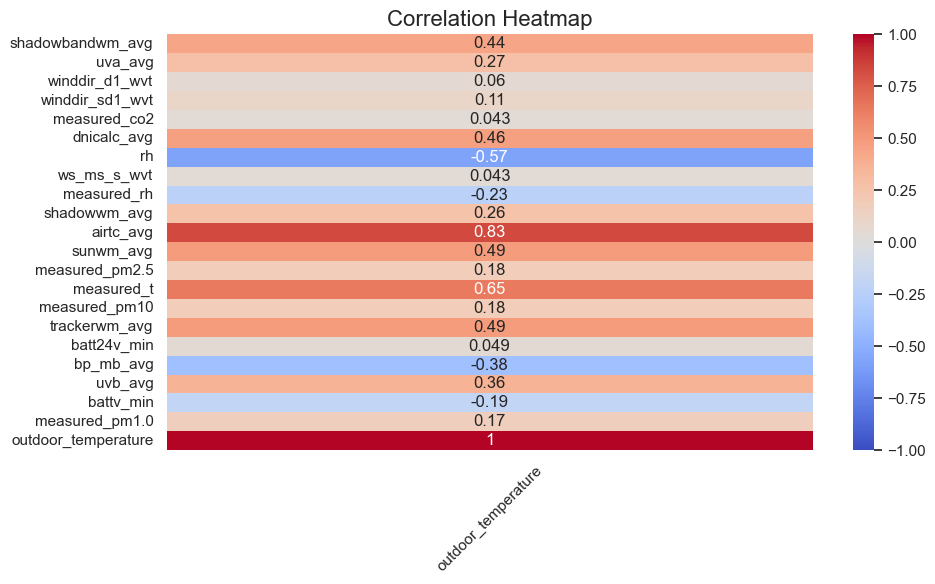

In [19]:
vis.heatmap(columns=cont_feats + [target_column, ], show_target_only=True)

In [20]:
df.slice_sequential(train_prop=TRAIN_SIZE, valid_prop=VALID_SIZE)

In [21]:
df.standardize_data(columns=cont_feats)

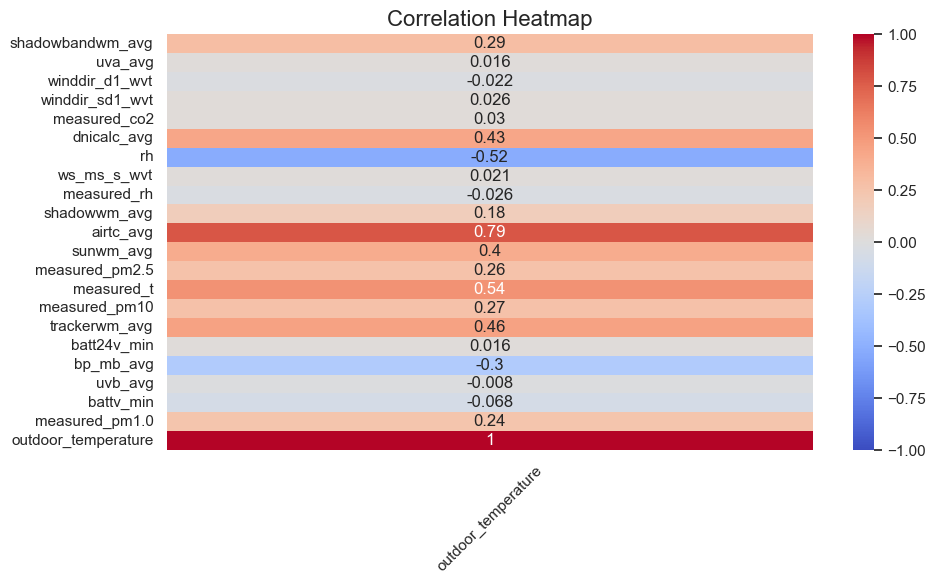

In [22]:
vis2 = Visualizer(df.train_df)
vis2.heatmap(columns=cont_feats + [target_column, ], show_target_only=True)


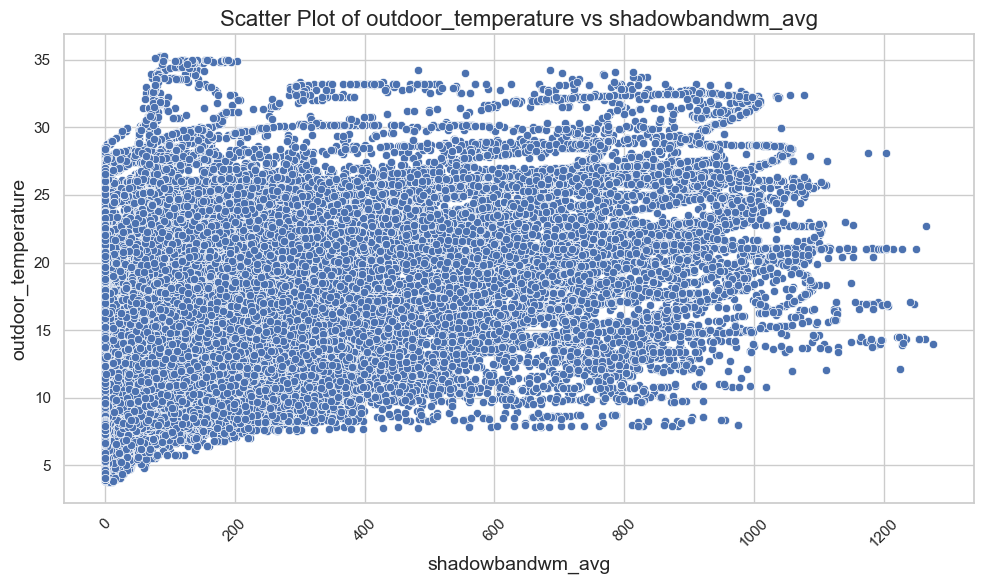

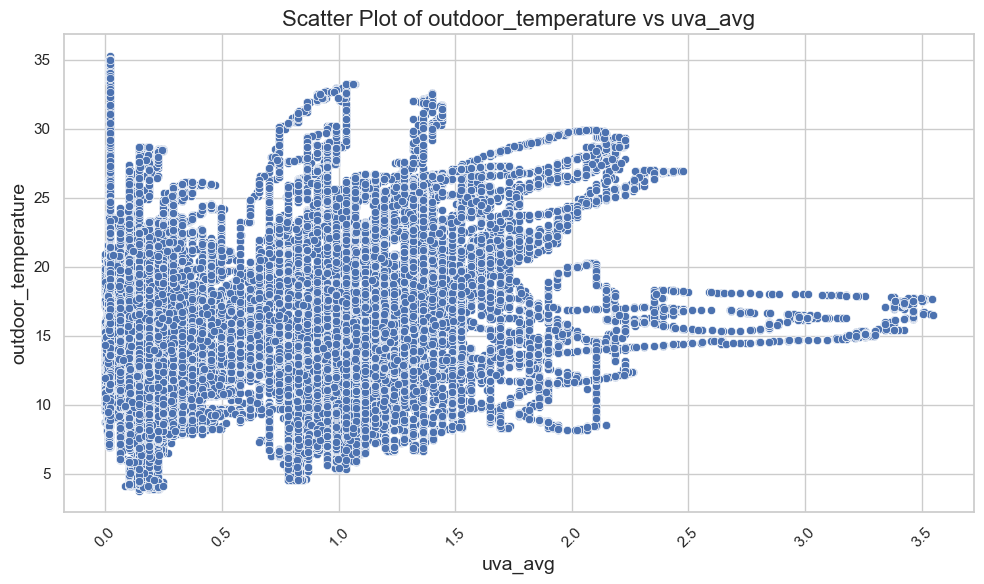

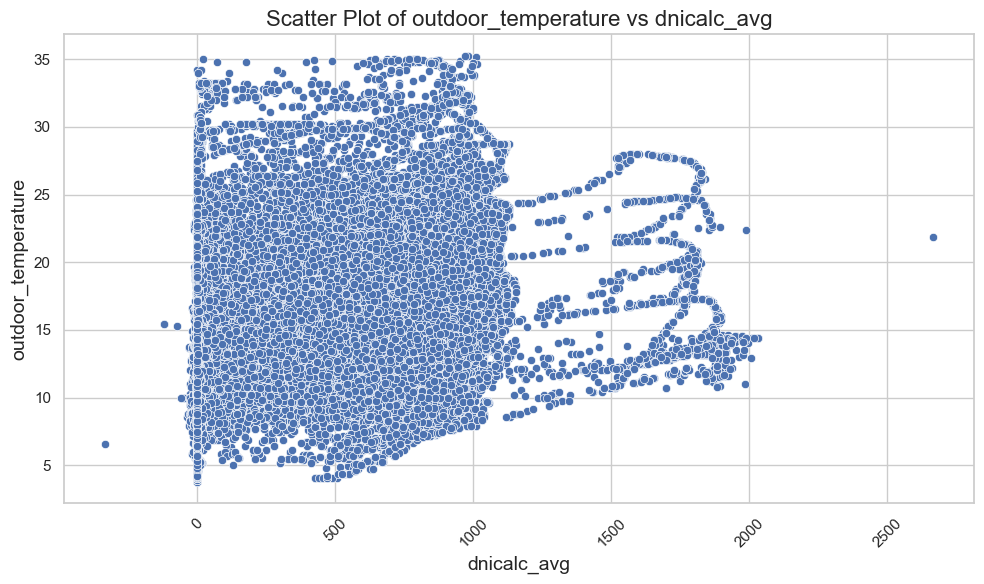

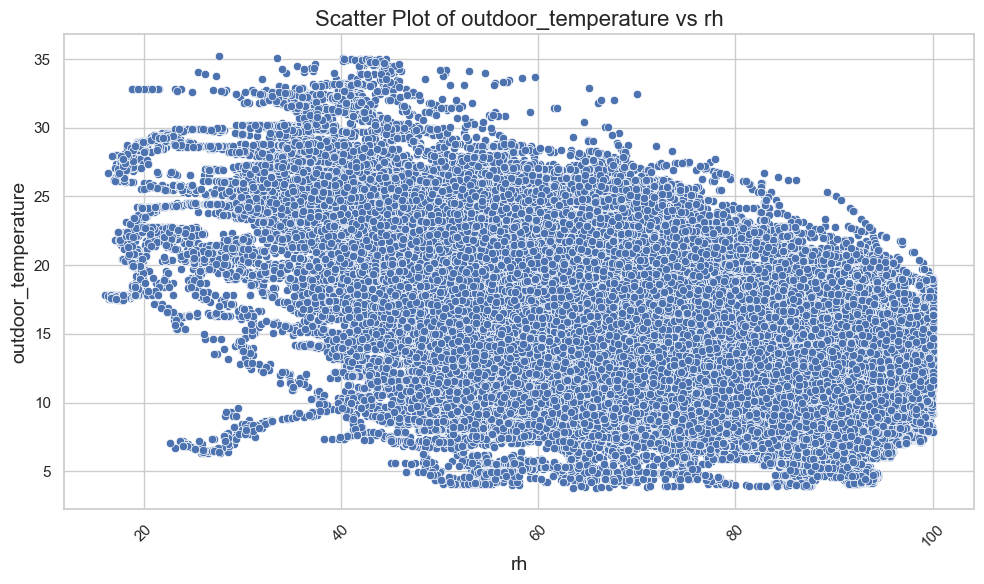

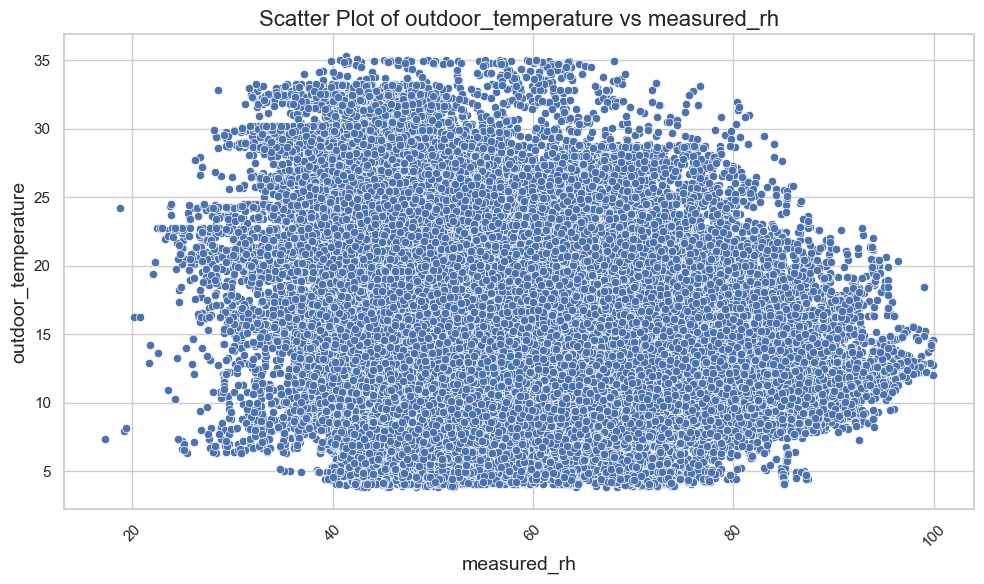

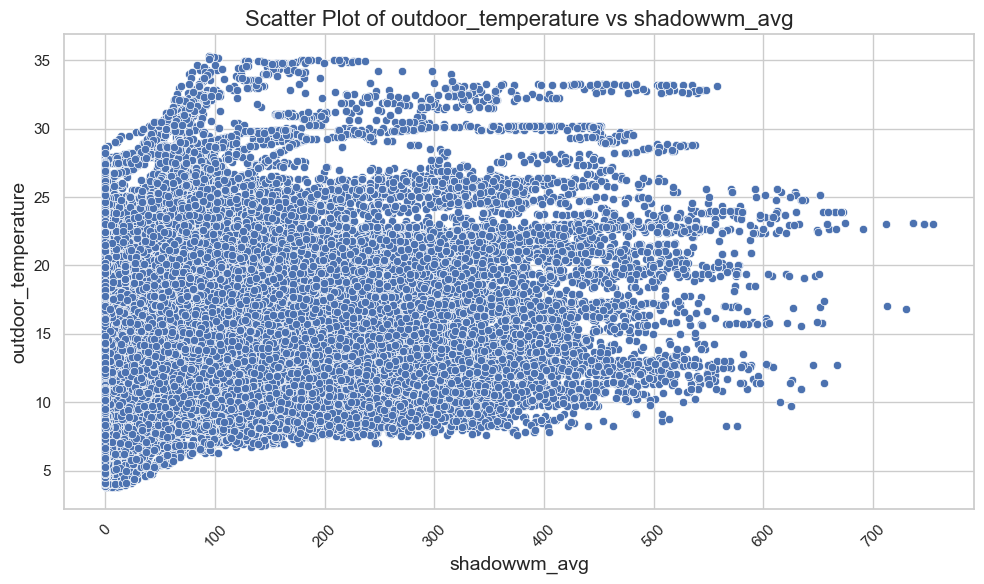

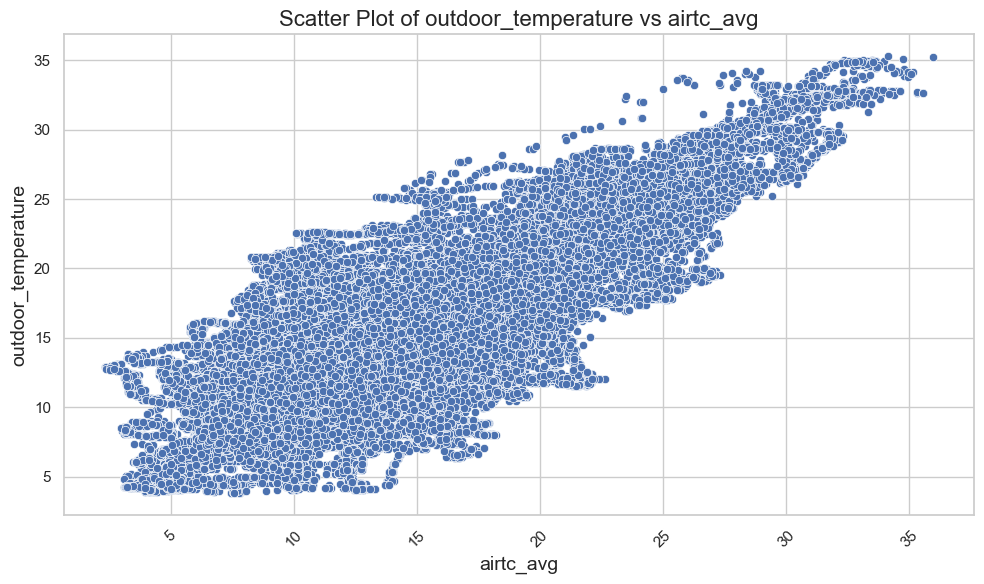

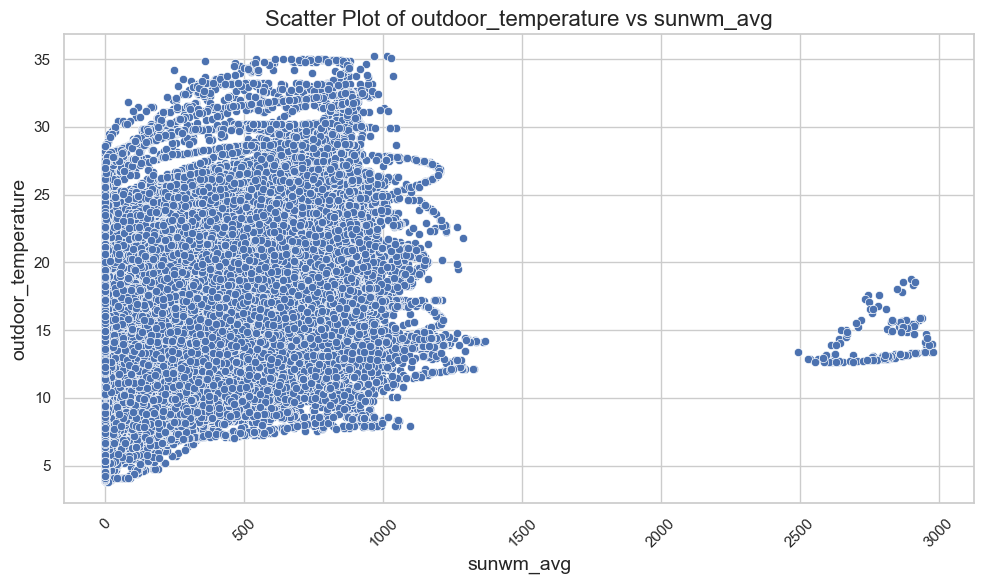

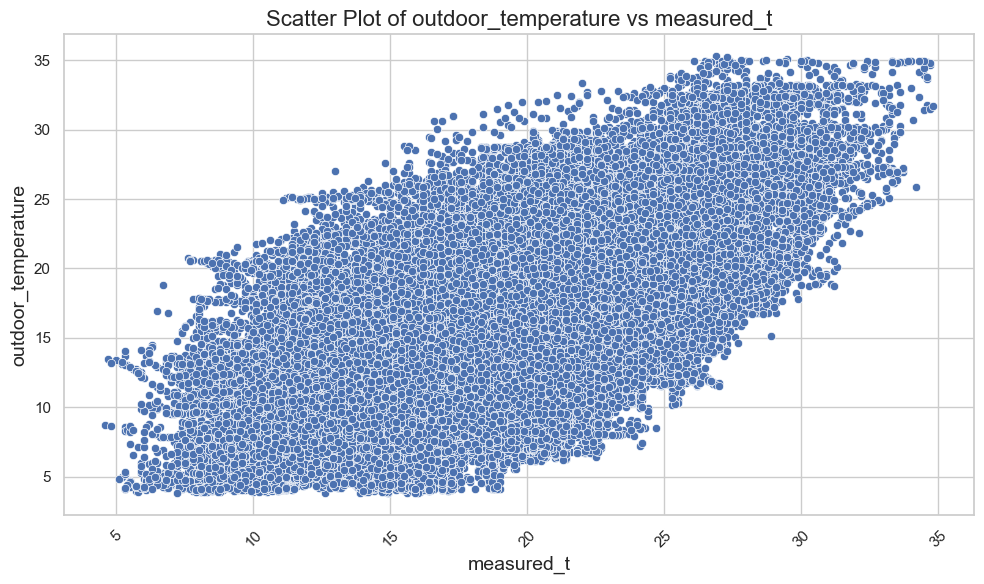

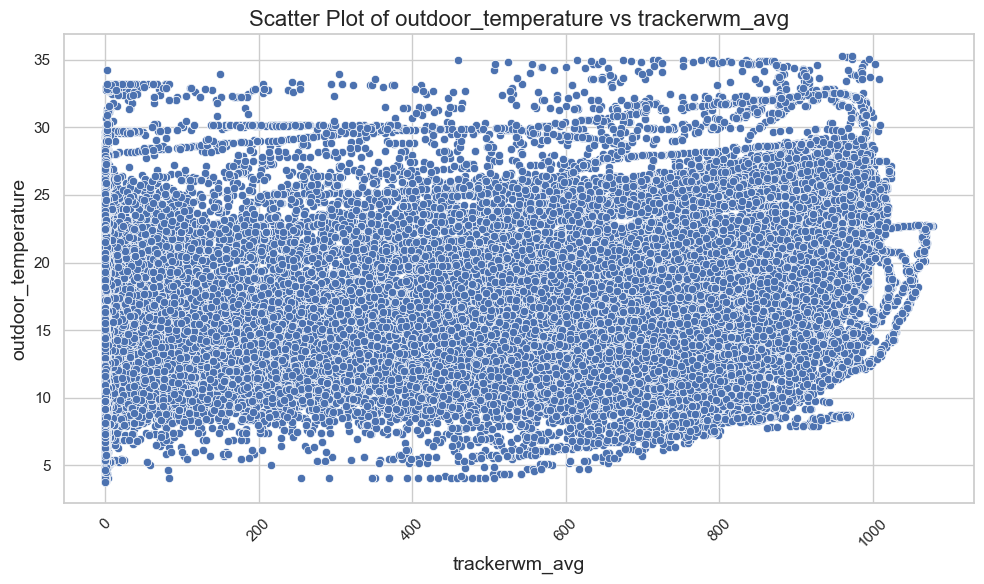

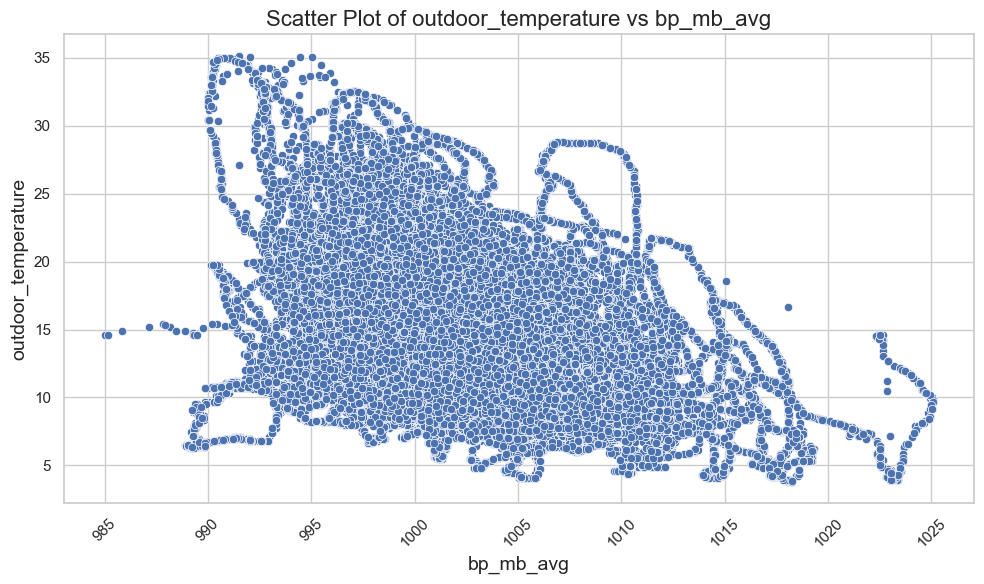

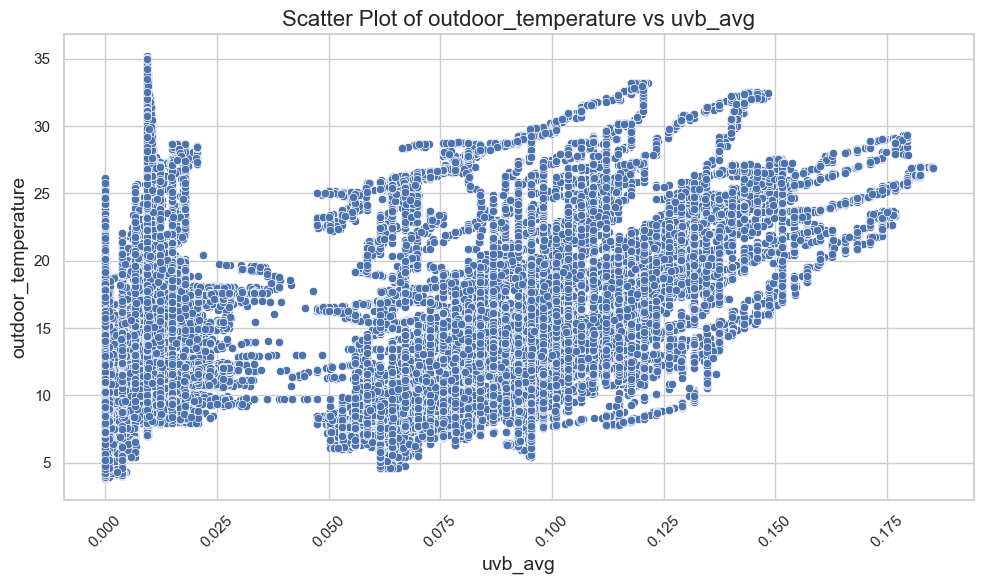

In [23]:
corr = df.cont_corr(cont_feats + [target_column, ])
for cont_feat in cont_feats:
    c = corr[cont_feat][target_column]
    if abs(c) >= 0.2 and abs(c) < 1.:
        vis.scatterplot(x=cont_feat, y=target_column, sample_size=0.5)

In [25]:
df.df.head()

date     time  room_no  device_code  school_no  grade  measured_t  \
0  08/02/2023  7:34:34        1            3          1      3        20.8   
1  08/02/2023  7:57:34        1            3          1      3        22.0   
2  08/02/2023  8:20:29        1            3          1      3        23.3   
3  08/02/2023  8:30:10        1            1          1      3        22.7   
4  08/02/2023  8:46:21        1            3          1      3        24.4   

   measured_rh  measured_co2  measured_pm1.0  ...  school_day_1  \
0         68.9    550.235222             1.0  ...           1.0   
1         69.1    550.235222             0.0  ...           1.0   
2         68.8    550.235222             1.0  ...           1.0   
3         61.2    550.235222             1.0  ...           1.0   
4         62.9    550.235222             2.0  ...           1.0   

   classroom_type_1  classroom_type_2 classroom_type_3  classroom_type_4  \
0               0.0               0.0              1.0               0.0   
1               0.0               0.0              1.0               0.0   
2               0.0               0.0              1.0               0.0   
3               0.0               0.0              1.0               0.0   
4               0.0               0.0              1.0               0.0   

   classroom_type_5  classroom_category_1  school_hours_1  power_on_1  \
0               0.0                   1.0             0.0         1.0   
1               0.0                   1.0             0.0         1.0   
2               0.0                   1.0             1.0         0.0   
3               0.0                   1.0             1.0         0.0   
4               0.0                   1.0             1.0         0.0   

   power_on_2  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 40 columns]

In [26]:
from typing import List
def write_file(path: str, lines: List[str]):
    with open(path, 'w') as w:
        for line in lines:
            w.write(f"{line}\n")
    w.close()
    

In [32]:
cat_feats_final = []
for k, v in cat_feats_groups.items():
    cat_feats_final.extend(v)

In [33]:
write_file("./dataset/processed/categorical_features.txt", cat_feats_final)
write_file("./dataset/processed/continious_features.txt", cont_feats)

df.save_train_df()
df.save_valid_df()
df.save_test_df()